###### DETECTING FLU EPIDEMICS VIA SEARCH ENGINE QUERY DATA 

In [41]:
flu=read.csv("Data Files/FluTrain.csv")

In [42]:
summary(flu)

                      Week          ILI            Queries       
 2004-01-04 - 2004-01-10:  1   Min.   :0.5341   Min.   :0.04117  
 2004-01-11 - 2004-01-17:  1   1st Qu.:0.9025   1st Qu.:0.15671  
 2004-01-18 - 2004-01-24:  1   Median :1.2526   Median :0.28154  
 2004-01-25 - 2004-01-31:  1   Mean   :1.6769   Mean   :0.28603  
 2004-02-01 - 2004-02-07:  1   3rd Qu.:2.0587   3rd Qu.:0.37849  
 2004-02-08 - 2004-02-14:  1   Max.   :7.6189   Max.   :1.00000  
 (Other)                :411                                     

In [43]:
which.max(flu$Queries)

[1] 303

In [44]:
flu[303,]

,Week,ILI,Queries
303,2009-10-18 - 2009-10-24,7.618892,1


In [45]:
flu[which.max(flu$ILI),]

,Week,ILI,Queries
303,2009-10-18 - 2009-10-24,7.618892,1


In [46]:
#Another method
flu$Week[which.max(flu$ILI)]

[1] 2009-10-18 - 2009-10-24
417 Levels: 2004-01-04 - 2004-01-10 ... 2011-12-25 - 2011-12-31

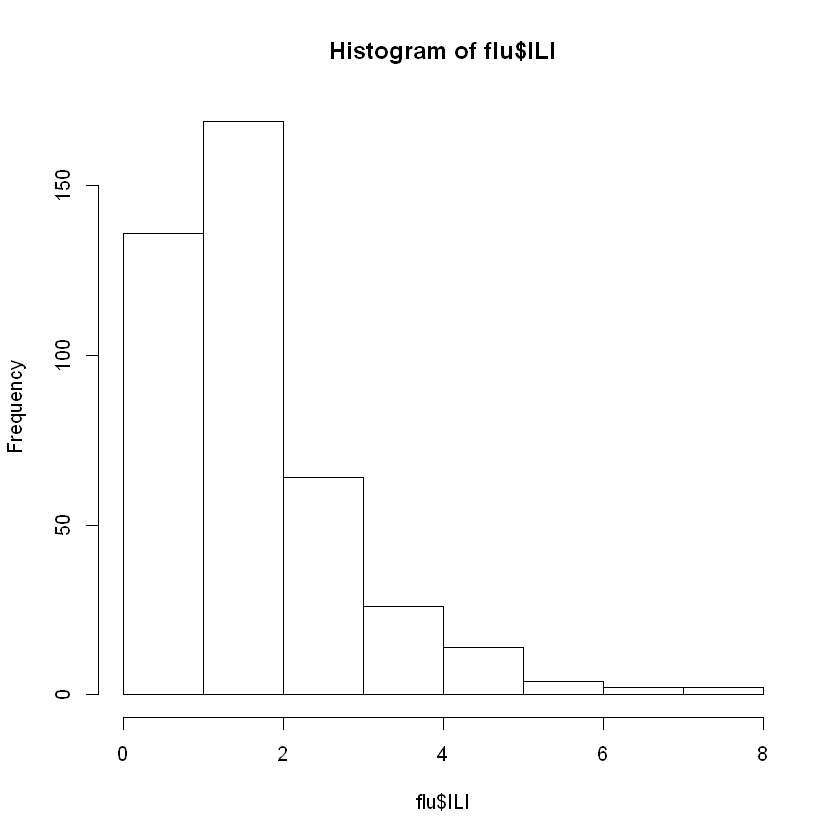

In [47]:
hist(flu$ILI)

    Most of the ILI values are small, with a relatively small number of much larger values (in statistics, this sort of data is called "skew right")

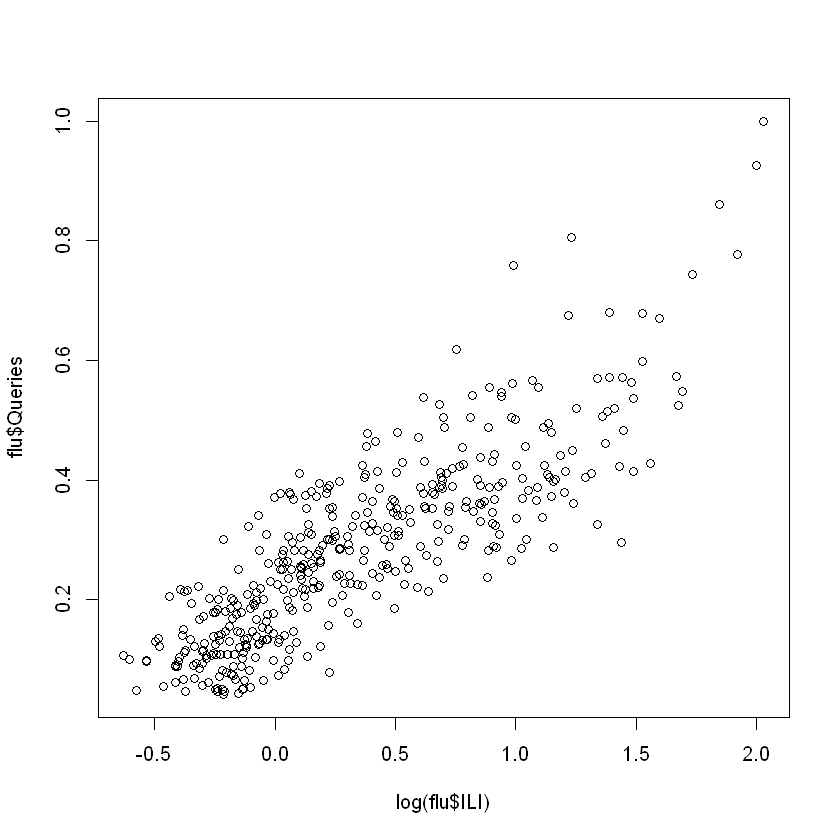

In [48]:
plot(log(flu$ILI),flu$Queries)

    When handling a skewed dependent variable, it is often useful to predict the logarithm of the dependent variable instead of the dependent variable itself -- this prevents the small number of unusually large or small observations from having an undue influence on the sum of squared errors of predictive models. In this problem, we will predict the natural log of the ILI variable, which can be computed in R using the log() function.

    log(ILI) = intercept + coefficient x Queries, where the coefficient is positive
    is the possible for this data as the plot shows a linear relationship

In [49]:
flutrend1=lm(log(ILI)~Queries,data=flu)

In [50]:
summary(flutrend1)


Call:
lm(formula = log(ILI) ~ Queries, data = flu)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.76003 -0.19696 -0.01657  0.18685  1.06450 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.49934    0.03041  -16.42   <2e-16 ***
Queries      2.96129    0.09312   31.80   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2995 on 415 degrees of freedom
Multiple R-squared:  0.709,	Adjusted R-squared:  0.7083 
F-statistic:  1011 on 1 and 415 DF,  p-value: < 2.2e-16


In [51]:
cor_var=cor(log(flu$ILI),flu$Queries)

In [52]:
log(1/cor_var)

[1] 0.1719357

In [53]:
exp(-0.5*cor_var)

[1] 0.6563792

In [54]:
cor_var^2

[1] 0.7090201

In [55]:
flutest=read.csv("Data Files/FluTest.csv")

In [56]:
predtest=exp(predict(flutrend1,newdata=flutest))

In [57]:
?which

which {base},R Documentation
x,a logical vector or array. NAs are allowed and omitted (treated as if FALSE).
arr.ind,logical; should array indices be returned when x is an array?
ind,"integer-valued index vector, as resulting from which(x)."
.dim,dim(.) integer vector
.dimnames,"optional list of character dimnames(.). If useNames is true, to be used for constructing dimnames for arrayInd() (and hence, which(*, arr.ind=TRUE)). If names(.dimnames) is not empty, these are used as column names. .dimnames[[1]] is used as row names."
useNames,logical indicating if the value of arrayInd() should have (non-null) dimnames at all.


In [58]:
which(flutest$Week=="2012-03-11 - 2012-03-17")

[1] 11

In [59]:
flutest[11,]

,Week,ILI,Queries
11,2012-03-11 - 2012-03-17,2.293422,0.4329349


In [60]:
(flutest[11,]$ILI-predtest[11])/flutest[11,]$ILI

11 
0.04623827

In [61]:
SSE=sum((predtest-flutest$ILI)^2)

In [62]:
RMSE=sqrt(SSE/nrow(flutest))

In [63]:
RMSE

[1] 0.7490645

In [39]:
library(zoo)

In [65]:
ILILag2 = lag(zoo(flu$ILI), -2, na.pad=TRUE)

In [66]:
flu$ILILag2 = coredata(ILILag2)

    In these commands, the value of -2 passed to lag means to return 2 observations before the current one; a positive value would have returned future observations. The parameter na.pad=TRUE means to add missing values for the first two weeks of our dataset, where we can't compute the data from 2 weeks earlier.

In [68]:
summary(ILILag2)

     Index        ILILag2      
 Min.   :  1   Min.   :0.5341  
 1st Qu.:105   1st Qu.:0.9010  
 Median :209   Median :1.2519  
 Mean   :209   Mean   :1.6754  
 3rd Qu.:313   3rd Qu.:2.0580  
 Max.   :417   Max.   :7.6189  
               NA's   :2       

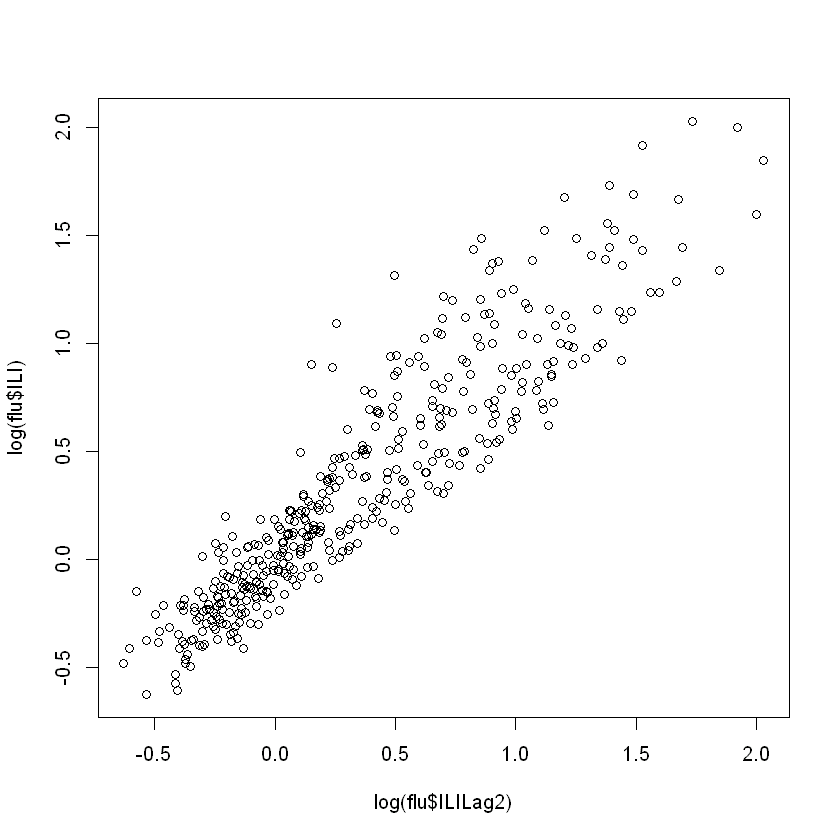

In [69]:
plot(log(flu$ILILag2),log(flu$ILI))

In [70]:
flutrend2=lm(log(ILI)~Queries+log(ILILag2),data=flu)

In [71]:
summary(flutrend2)


Call:
lm(formula = log(ILI) ~ Queries + log(ILILag2), data = flu)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.52209 -0.11082 -0.01819  0.08143  0.76785 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.24064    0.01953  -12.32   <2e-16 ***
Queries       1.25578    0.07910   15.88   <2e-16 ***
log(ILILag2)  0.65569    0.02251   29.14   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1703 on 412 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.9063,	Adjusted R-squared:  0.9059 
F-statistic:  1993 on 2 and 412 DF,  p-value: < 2.2e-16


In [73]:
ILILag2test = lag(zoo(flutest$ILI), -2, na.pad=TRUE)

In [74]:
flutest$ILILag2 = coredata(ILILag2test)

In [75]:
summary(flutest)

                      Week         ILI            Queries      
 2012-01-01 - 2012-01-07: 1   Min.   :0.9018   Min.   :0.2390  
 2012-01-08 - 2012-01-14: 1   1st Qu.:1.1535   1st Qu.:0.2772  
 2012-01-15 - 2012-01-21: 1   Median :1.3592   Median :0.3924  
 2012-01-22 - 2012-01-28: 1   Mean   :1.6638   Mean   :0.4094  
 2012-01-29 - 2012-02-04: 1   3rd Qu.:1.8637   3rd Qu.:0.4874  
 2012-02-05 - 2012-02-11: 1   Max.   :6.0336   Max.   :0.8054  
 (Other)                :46                                    
    ILILag2      
 Min.   :0.9018  
 1st Qu.:1.1359  
 Median :1.3409  
 Mean   :1.5188  
 3rd Qu.:1.7606  
 Max.   :3.6002  
 NA's   :2       

In [88]:
flutest$ILILag2[1]=flu$ILI[415]

In [89]:
flutest$ILILag2[2]=flu$ILI[416]

In [90]:
flutest$ILILag2[2]

[1] 1.852736

In [96]:
flutrend2=lm(log(ILI)~Queries+ILILag2,data=flu)

In [104]:
test=exp(predict(flutrend2,newdata=flutest))

In [105]:
SSE=sum(((flutest$ILI)-test)^2)

In [106]:
sqrt((SSE)/nrow(flutest))

[1] 0.243613